#  Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set your experiment and draw graphs.

<img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-87e283c45681b77d206771377e0a02eb_l3.svg">
<img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-f4f7e334863659df19297a0fe5e90bb3_l3.svg">
<img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-c3eedddf94dbadbcfa7c98de09ebbb39_l3.svg">
<img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-d60a6899898e0f23c4583e4519ea233d_l3.svg">
<img src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-9c8279b94a216c678cf09fa9a5859358_l3.svg">

## Using the Random_Numbers for LWR

In [15]:
from sklearn import datasets 
import numpy as np
from math import ceil
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)
from matplotlib import pyplot as plt
from scipy import linalg

In [21]:
iris = datasets.load_iris()
#display(iris)

In [52]:
def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    Δ = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = Δ * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        Δ = np.clip(residuals / (6.0 * s), -1, 1)
        Δ = (1 - Δ ** 2) ** 2
    return yest


C:\Users\y21cs185\AppData\Local\Temp\ipykernel_6640\3977391942.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,"r.",color='blue')
C:\Users\y21cs185\AppData\Local\Temp\ipykernel_6640\3977391942.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,yest,"b-",color='red')


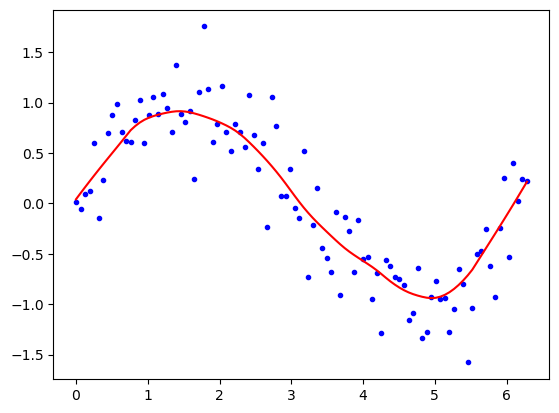

In [53]:
import math
n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f = 0.25
iterations = 3
yest = lowess(x, y, f, iterations)
plt.plot(x,y,"r.",color='blue')
plt.plot(x,yest,"b-",color='red')

In [58]:
from sklearn import datasets 
import numpy as np
from math import ceil
from scipy import linalg
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('10-dataset.csv')
x = data['total_bill'].values 
y = data['tip'].values  

C:\Users\y21cs185\AppData\Local\Temp\ipykernel_6640\3138562331.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, "r.", color='blue')
C:\Users\y21cs185\AppData\Local\Temp\ipykernel_6640\3138562331.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, yest, "b-", color='red')


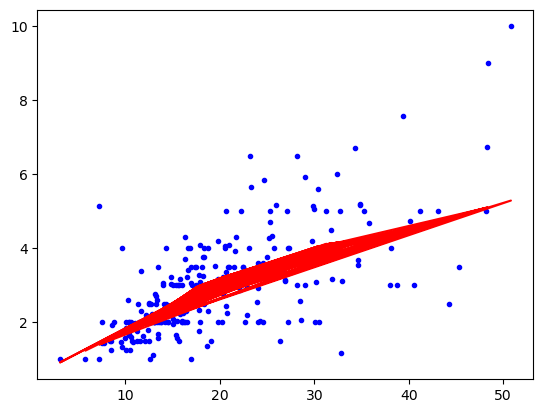

In [75]:
def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    Δ = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = Δ * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        Δ = np.clip(residuals / (6.0 * s), -1, 1)
        Δ = (1 - Δ ** 2) ** 2
    return yest

f = 0.25
iterations = 3
yest = lowess(x, y, f, iterations)

plt.plot(x, y, "r.", color='blue')
plt.plot(x, yest, "b-", color='red')
plt.show()